# Exploration Loan Data from Prosper
## by Jannis

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import io

%matplotlib inline
pd.set_option('display.max_columns', 50)

In [4]:
# Loading the dataset with request libary and saving dataset as CSV file
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
response = requests.get(url).content
data = pd.read_csv(io.StringIO(response.decode('utf-8')))
data.to_csv('loan_data.csv')

In [2]:
# creating new data frame called loan_data
loan_data = pd.read_csv('loan_data.csv')
loan_data.head()

,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,...,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,...,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,...,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,...,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,...,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,...,11000.0,9947.9,NaN,0,NaN,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# high-level overview of data shape and composition
print(loan_data.shape)
print(loan_data.dtypes)

(113937, 82)
Unnamed: 0                               int64
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object


### The structure of the dataset

The Data set contains 113,937 loans (rows) with 81 variables (columns) on each loan. Most variables are integers (numeric) or strings (objects). But the dataset also has some categorical variables: for example CreditGrade, ProsperRating, EmploymentStatus, LoanStatus, ProsperScore

(worst) ——> (best)

### Main features of interest in the dataset

The huge dataset with a lot of informaton (81 variables) allows me to have deeper look at the question what factors affect a loan’s outcome status (Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue)?

This is a very critical question for banks and loan companies in order to minimize the default risk and and to set the right interest rate (including setting a proper risk premium).

This investigation might help to find out what factors predict the outcome of a loan best. 
  


### Features in the dataset that will help support the investigation

I think the factors that have the most influence on predicting the outcome of a loan are:

 - Term (The length of the loan expressed in months)
 - ProsperScore (custom risk score)
 - EmploymentStatus (The employment status of the borrower)
 - MonthlyLoanPayment
 - IncomeRange
 - BorrowerAPR
 - BorrowerRate
 - LoanOriginalAmount
 - OpenCreditLines (Number of open credit line)
 - TotalProsperPaymentsBilled (number of on time payments the borrower made on Prosper loans at the time they created this listing)
 - Recommendations

Whereby I expect  to have  `ProsperScore`, `TotalProsperPaymentsBilled`, `LoanOriginalAmount`, `BorrowerRate`,  (high interest rate are associated with higher default risk) and `monthly loan payment`  have  the strongest effect on the loan's outcome status.
 

In the first step I will create a copy of the dataset with the variables of interest

In [68]:
# create a copy of the dataset
loan_data_clean = loan_data.copy()
# include all variables that are needed in the investigation in the clean copy
loan_data_clean = loan_data_clean[['Term','ProsperScore','EmploymentStatus', 'MonthlyLoanPayment', 'Recommendations','BorrowerAPR','BorrowerRate','LoanOriginalAmount', 'OpenCreditLines','StatedMonthlyIncome','TotalProsperPaymentsBilled', 'IncomeRange']]
#getting a overview over the new dataset
print(loan_data_clean.head())
print(loan_data_clean.info())

   Term  ProsperScore EmploymentStatus  MonthlyLoanPayment  Recommendations  \
0    36           NaN    Self-employed              330.43                0   
1    36           7.0         Employed              318.93                0   
2    36           NaN    Not available              123.32                0   
3    36           9.0         Employed              321.45                0   
4    36           4.0         Employed              563.97                0   

   BorrowerAPR  BorrowerRate  LoanOriginalAmount  OpenCreditLines  \
0      0.16516        0.1580                9425              4.0   
1      0.12016        0.0920               10000             14.0   
2      0.28269        0.2750                3001              NaN   
3      0.12528        0.0974               10000              5.0   
4      0.24614        0.2085               15000             19.0   

   StatedMonthlyIncome  TotalProsperPaymentsBilled     IncomeRange  
0          3083.333333                   

I decided to work with a smaller number of observations since I wasnt able to perform operations in my local notebook

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest ProsperScore, TotalProsperPaymentsBilled, BorrowerRate and IncomeRange.


> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.




> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

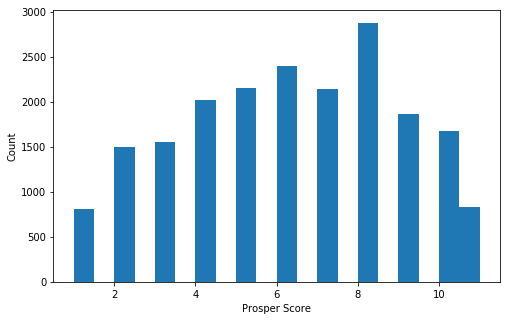

In [9]:
# Histogramm Prosper Score
binsize = 0.5
bins = np.arange(1, loan_data_clean.ProsperScore.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'ProsperScore', bins = bins)
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.show()

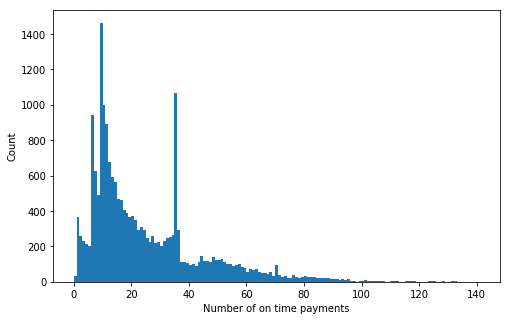

In [10]:
# Histogramm TotalProsperPaymentsBilled (Number of on time payments)
binsize = 1
bins = np.arange(loan_data_clean.TotalProsperPaymentsBilled.min(), loan_data_clean.TotalProsperPaymentsBilled.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'TotalProsperPaymentsBilled', bins = bins)
plt.xlabel('Number of on time payments')
plt.ylabel('Count')
plt.show()

In [13]:
# getting a first overview over the variable BorrowerRate
loan_data.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

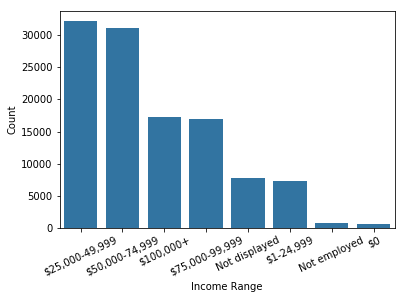

In [67]:
sb.countplot(data= loan_data_clean, x= 'IncomeRange', color= base_color, order=loan_data_clean['IncomeRange'].value_counts().index)
plt.xticks(rotation=25)
plt.xlabel('Income Range')
plt.ylabel('Count');

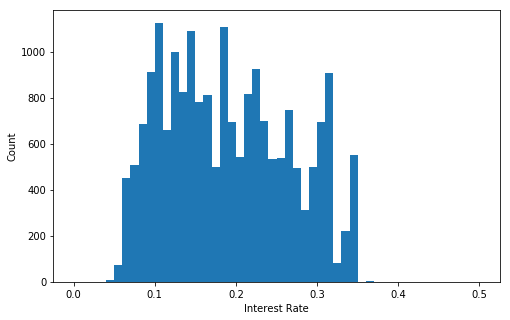

In [14]:
# Histogramm  BorrowerRate (Borrower's interest rate for this loan.)
binsize = 0.01
bins = np.arange(loan_data.BorrowerRate.min(), loan_data.BorrowerRate.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'BorrowerRate', bins = bins)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.show()

Now I also will plot the remainig factors:

 - Term                          
 - EmploymentStatus              
 - Recommendations                   
 - BorrowerAPR                                    
 - OpenCreditLines
 - LoanOriginalAmount 
 - MonthlyLoanPayment
               
  

In [10]:
# getting a first overview over the variable Term
loan_data_clean.Term.describe()

count    113937.000000
mean         40.830248
std          10.436212
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

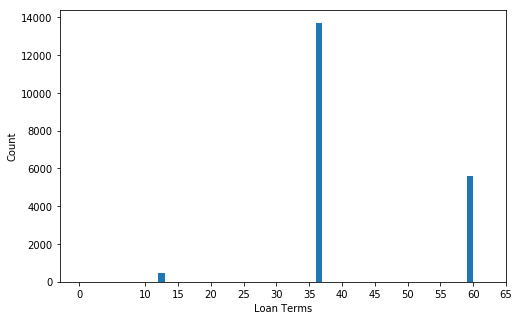

In [15]:
# plotting Term (The length of the loan expressed in months)
binsize = 1
bins = np.arange(0, loan_data_clean.Term.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'Term', bins = bins)
plt.xlabel('Loan Terms')
plt.ylabel('Count')
plt.xticks([0,10,15,20,25,30,35,40,45,50,55,60,65])
plt.show()

In [16]:
# getting a first overview over the variable EmploymentStatus
loan_data_clean.EmploymentStatus.describe()

count        19797
unique           7
top       Employed
freq         13157
Name: EmploymentStatus, dtype: object

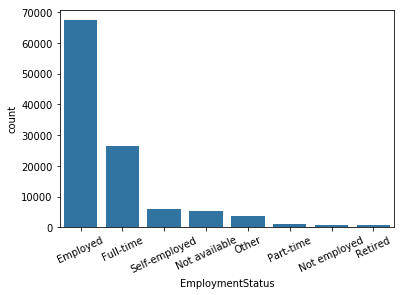

In [61]:
# plotting EmploymentStatus (The employment status of the borrower at the time they posted the listing) 
base_color = sb.color_palette()[0]
sb.countplot(data= loan_data_clean, x= 'EmploymentStatus', color= base_color, order=loan_data_clean['EmploymentStatus'].value_counts().index)
plt.xticks(rotation=25)
plt.xlabel('Employment Status')
plt.ylabel('Count');

In [7]:
# getting a first overview over the variable BorrowerAPR
loan_data_clean.BorrowerAPR.describe()

count    19797.000000
mean         0.065060
std          0.369599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.000000
Name: Recommendations, dtype: float64

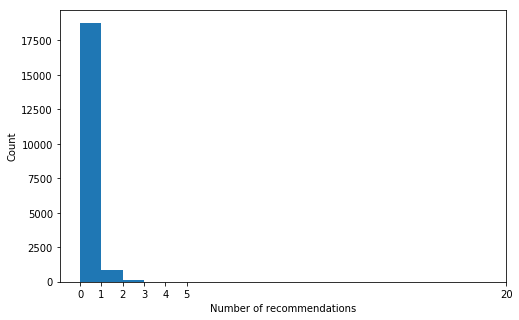

In [29]:
# plotting Recommendations(Number of recommendations the borrower had at the time th)
binsize = 1
bins = np.arange(0, loan_data_clean.Recommendations.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'Recommendations', bins = bins)
plt.xlabel('Number of recommendations')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4,5,20])
plt.show()

In [30]:
# getting a first overview over the variable BorrowerAPR
loan_data_clean.BorrowerAPR.describe()

count    19797.000000
mean         0.220944
std          0.082756
min          0.045830
25%          0.153240
50%          0.214740
75%          0.287040
max          0.413550
Name: BorrowerAPR, dtype: float64

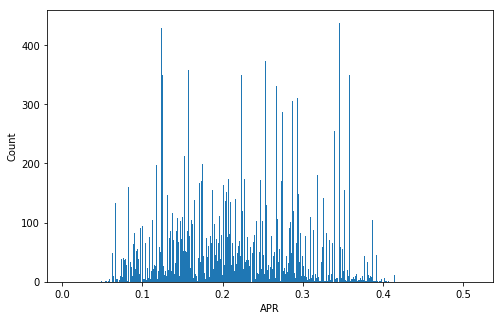

In [42]:
# Histogramm BorrowerAPR (The Borrower's Annual Percentage Rate (APR) for the loan)
binsize = 0.001
bins = np.arange(loan_data.BorrowerAPR.min(), loan_data.BorrowerAPR.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'BorrowerAPR', bins = bins)
plt.xlabel('APR')
plt.ylabel('Count')
plt.show()

In [34]:
# getting a first overview over the variable OpenCreditLines
loan_data_clean.OpenCreditLines.describe()

count    19797.000000
mean         9.782139
std          5.002805
min          0.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         49.000000
Name: OpenCreditLines, dtype: float64

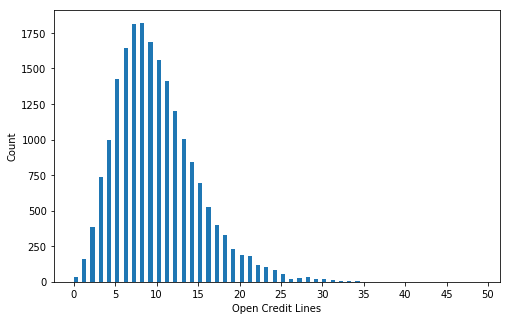

In [44]:
# Histogramm OpenCreditLines (Number of open credit lines at the time the credit profile was pulled)
binsize = 0.5
bins = np.arange(0, loan_data_clean.OpenCreditLines.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'OpenCreditLines', bins = bins)
plt.xlabel('Open Credit Lines')
plt.ylabel('Count')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.show()

In [43]:
# getting a first overview over the variable LoanOriginalAmount
loan_data_clean.LoanOriginalAmount.describe()

count    19797.000000
mean      7874.556094
std       5404.231904
min       1000.000000
25%       4000.000000
50%       6500.000000
75%      11000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

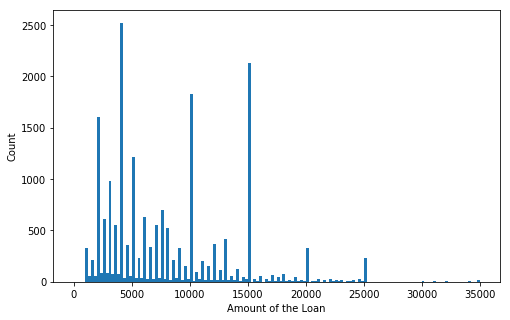

In [50]:
# Histogramm LoanOriginalAmount (The origination amount of the loan)
binsize = 250
bins = np.arange(0, loan_data_clean.LoanOriginalAmount.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Amount of the Loan')
plt.ylabel('Count')
plt.show()

In [11]:
# getting a first overview over the variable MonthlyLoanPayment
loan_data_clean.MonthlyLoanPayment.describe()

count    19797.000000
mean       253.890366
std        162.866592
min          0.000000
25%        130.950000
50%        214.980000
75%        346.500000
max       2134.060000
Name: MonthlyLoanPayment, dtype: float64

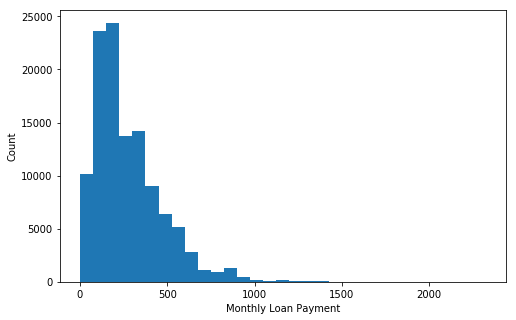

In [70]:
binsize = 75
bins = np.arange(loan_data_clean.MonthlyLoanPayment.min(), loan_data_clean.MonthlyLoanPayment.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Count')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

### Engineering a new variable

In [50]:
print(loan_data_clean.StatedMonthlyIncome.head())
print(loan_data_clean.MonthlyLoanPayment.head())

0    3083.333333
1    6125.000000
2    2083.333333
3    2875.000000
4    9583.333333
Name: StatedMonthlyIncome, dtype: float64
0    330.43
1    318.93
2    123.32
3    321.45
4    563.97
Name: MonthlyLoanPayment, dtype: float64


In [43]:
# in the first step I create a new variable ratio_income_loanPayment
loan_data_clean['ratio_income_loanPayment'] = (loan_data_clean.MonthlyLoanPayment / loan_data_clean.StatedMonthlyIncome)*100
# round the ratio to 2 decimals
loan_data_clean['ratio_income_loanPayment'] = loan_data_clean['ratio_income_loanPayment'].round(2)
print(loan_data_clean['ratio_income_loanPayment'].sample(3))
print(loan_data_clean['ratio_income_loanPayment'].describe())

14647    7.16
41035    2.09
66663    8.55
Name: ratio_income_loanPayment, dtype: float64
count    113922.00
mean           inf
std            NaN
min           0.00
25%           2.86
50%           4.96
75%           7.86
max            inf
Name: ratio_income_loanPayment, dtype: float64


One can see from the statisitcs that there are null values and values generate by dividing by zero

In [37]:
loan_data_clean.StatedMonthlyIncome.value_counts().head(20)

4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
5833.333333     2319
6250.000000     2276
2500.000000     2256
4583.333333     2211
6666.666667     2162
2916.666667     1984
8333.333333     1680
4333.333333     1527
7083.333333     1464
7500.000000     1448
3500.000000     1394
0.000000        1394
10000.000000    1282
4000.000000     1260
2083.333333     1256
Name: StatedMonthlyIncome, dtype: int64

In [38]:
loan_data_clean.MonthlyLoanPayment.value_counts().head(20)

173.71    2423
0.00       935
172.76     536
86.85      472
174.20     460
130.28     370
163.28     286
326.62     280
166.54     277
136.98     277
165.15     271
161.99     265
169.78     256
163.56     252
45.24      248
168.17     246
168.89     227
87.10      187
67.85      184
166.73     183
Name: MonthlyLoanPayment, dtype: int64